In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_vienna = pd.read_csv('Vienna subway.csv', sep=';')
df_vienna

,Start,Stop,Line,Color
0,Oberlaa,Neulaa,1,red
1,Neulaa,Alaudagasse,1,red
2,Alaudagasse,Altes Landgut,1,red
3,Altes Landgut,Troststrasse,1,red
4,Troststrasse,Reumannplatz,1,red
...,...,...,...,...
99,Spittelau,Jaegerstrasse,6,brown
100,Jaegerstrasse,Dresdner strasse,6,brown
101,Dresdner strasse,Handelskai,6,brown
102,Handelskai,Neue Donau,6,brown


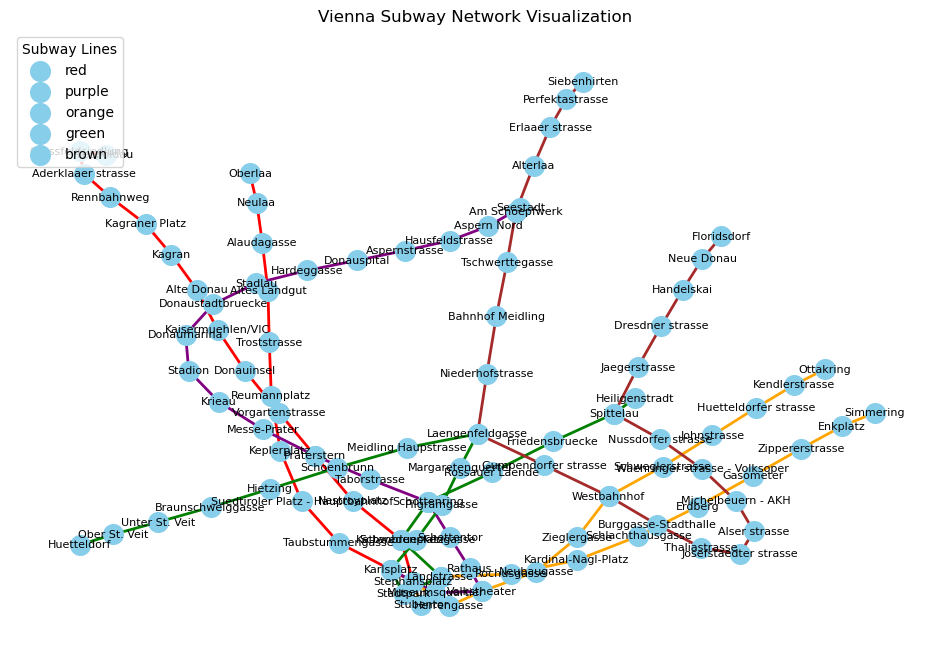

In [29]:
G = nx.Graph()

for _, row in df_vienna.iterrows():
    G.add_edge(row['Start'], row['Stop'], color=row['Color'])

line_colors = df_vienna['Color'].unique()
    
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

for color in line_colors:
    subgraph_edges = [(u, v) for u, v, c in G.edges(data='color') if c == color]
    subgraph_nodes = {node for edge in subgraph_edges for node in edge}

    nx.draw_networkx_edges(G, pos=pos, edgelist=subgraph_edges, edge_color=color, width=2)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=subgraph_nodes, node_color='skyblue', node_size=200, label=color)

node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=node_labels, font_size=8)

plt.legend(title="Subway Lines", loc='upper left')

plt.title("Vienna Subway Network Visualization")
plt.axis('off')
plt.show()

In [5]:
def calculate_network_centralities(graph):
    degree_centralities = nx.degree_centrality(graph)
    closeness_centralities = nx.closeness_centrality(graph)
    betweenness_centralities = nx.betweenness_centrality(graph)
    eigenvector_centralities = nx.eigenvector_centrality(graph)
    degrees = dict(nx.degree(graph))
    clustering_coefficients = nx.clustering(graph)
    centralities_df = pd.DataFrame({
        'Node_Degree': degrees,
        'Degree_Centrality': degree_centralities,
        'Closeness_Centrality': closeness_centralities,
        'Betweenness_Centrality': betweenness_centralities,
        'Eigenvector_Centrality': eigenvector_centralities,
        'Clustering_Coefficient': clustering_coefficients
    })
    
    return centralities_df

centralities_df = calculate_network_centralities(G)
centralities_df

,Node_Degree,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Clustering_Coefficient
Oberlaa,1,0.010309,0.066621,0.000000,0.000057,0
Neulaa,2,0.020619,0.071324,0.020619,0.000171,0
Alaudagasse,2,0.020619,0.076619,0.040808,0.000454,0
Altes Landgut,2,0.020619,0.082624,0.060567,0.001184,0
Troststrasse,2,0.020619,0.089483,0.079897,0.003084,0
...,...,...,...,...,...,...
Jaegerstrasse,2,0.020619,0.100518,0.079897,0.007668,0
Dresdner strasse,2,0.020619,0.091943,0.060567,0.002946,0
Handelskai,2,0.020619,0.084568,0.040808,0.001129,0
Neue Donau,2,0.020619,0.078163,0.020619,0.000426,0


In [11]:
centralities_df.sort_values(by='Eigenvector_Centrality', ascending=False)

,Node_Degree,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Clustering_Coefficient
Stephansplatz,4,0.041237,0.148545,0.307775,0.397593,0
Schwedenplatz,4,0.041237,0.149461,0.380799,0.380823,0
Karlsplatz,5,0.051546,0.146084,0.388406,0.368212,0
Landstrasse,4,0.041237,0.139769,0.166201,0.329666,0
Stubentor,2,0.020619,0.132877,0.009504,0.243492,0
...,...,...,...,...,...,...
Hausfeldstrasse,2,0.020619,0.062140,0.040808,0.000009,0
Leopoldau,1,0.010309,0.060587,0.000000,0.000008,0
Siebenhirten,1,0.010309,0.063523,0.000000,0.000007,0
Aspern Nord,2,0.020619,0.058610,0.020619,0.000004,0


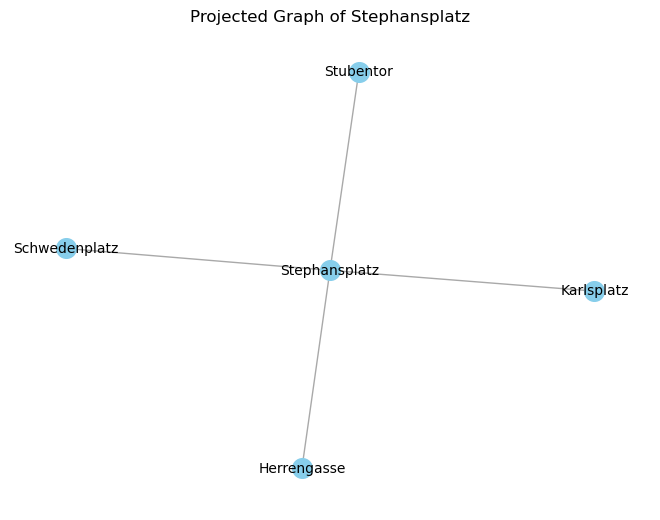

In [13]:
node = "Stephansplatz"
focus_neighbors = G.neighbors(node)

subgraph = G.subgraph([node] + list(focus_neighbors))

pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, edge_color='darkgray')
plt.title("Projected Graph of " + node)
plt.show()

In [36]:
def analyze_network(adjacency_matrix):
    """The steps in network analysis as shown above but automated to be able to be used on the fly for other adjacency matrices."""
    G = nx.Graph(adjacency_matrix)
    N = G.order()
    L = G.size()
    avg_deg = float(L) / N
    print('Network Statistics:')
    print('Nodes: ', N)
    print('Edges: ', L)
    print('Average degree: ', avg_deg)
    degrees = [k for node, k in G.degree()]
    k_min = np.min(degrees)
    k_max = np.max(degrees)
    k_avg = np.mean(degrees)
    print('Degree Distribution:')
    print('Minimum degree: ', k_min)
    print('Maximum degree: ', k_max)
    print('Average degree: ', k_avg)
    p, k = np.histogram(degrees, bins=6)
    plt.figure()
    plt.bar(k[1:], p)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()
    avg_shortest_path = nx.average_shortest_path_length(G)
    all_shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    print('Average shortest path length: ', avg_shortest_path)
    clustering_coefficient = nx.clustering(G)
    avg_clustering_coefficient = sum(clustering_coefficient.values()) / len(clustering_coefficient)
    print('Average clustering coefficient: ', avg_clustering_coefficient)

In [37]:
adj_matrix = nx.adjacency_matrix(G).toarray()

Network Statistics:
Nodes:  98
Edges:  104
Average degree:  1.0612244897959184
Degree Distribution:
Minimum degree:  1
Maximum degree:  5
Average degree:  2.122448979591837


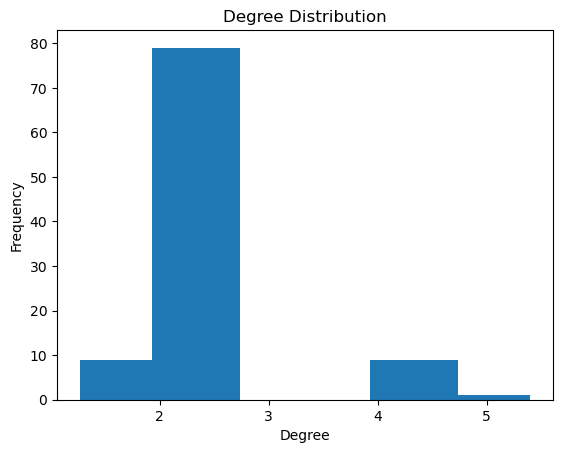

Average shortest path length:  10.670523879654954
Average clustering coefficient:  0.0


In [38]:
analyze_network(adj_matrix)

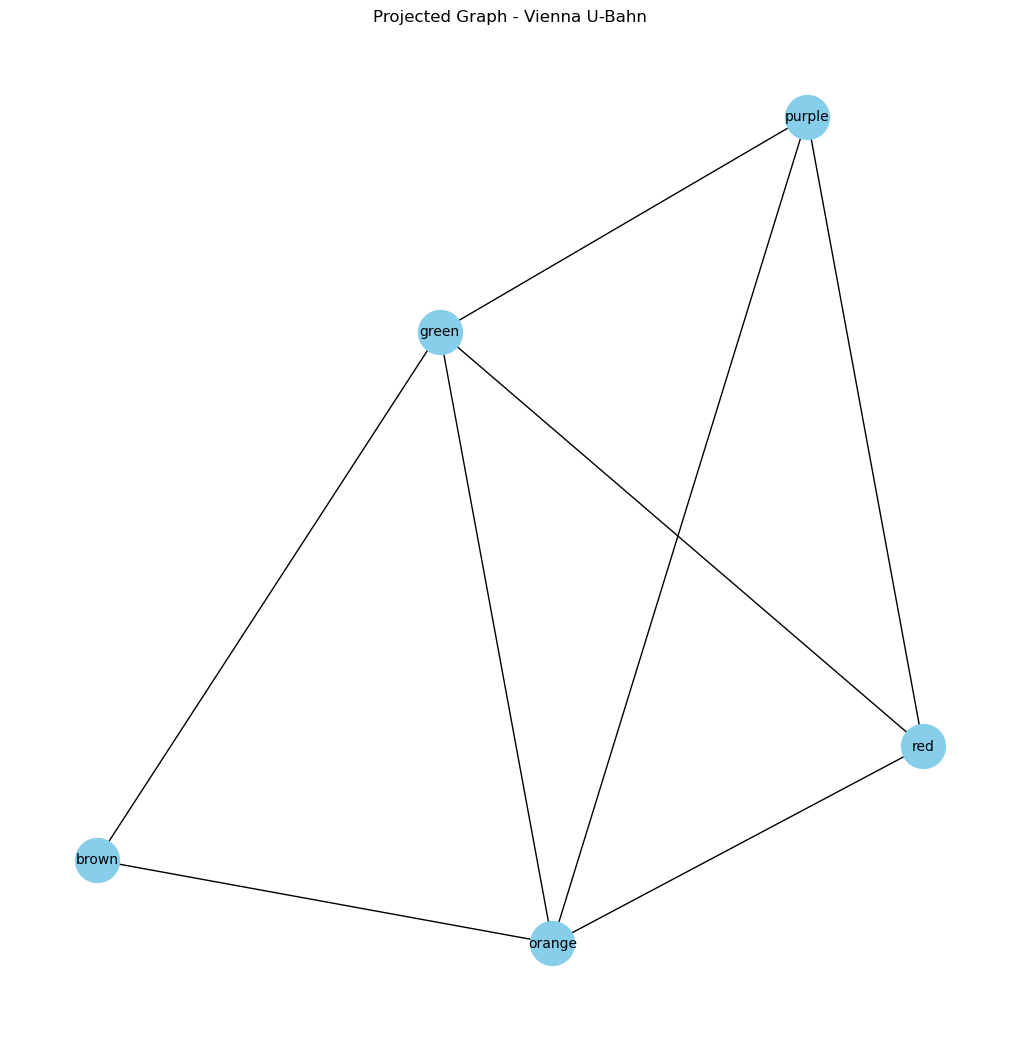

In [39]:
# Create a bipartite graph
G_bipartite = nx.Graph()
for _, row in df_vienna.iterrows():
    G_bipartite.add_node(row['Start'], bipartite='Line')
    G_bipartite.add_node(row['Color'], bipartite='Color')
    G_bipartite.add_edge(row['Start'], row['Color'])

# Project the bipartite graph onto 'Color' nodes
color_nodes = {node for node, attr in G_bipartite.nodes(data=True) if attr['bipartite'] == 'Color'}
G_vienna = nx.bipartite.projected_graph(G_bipartite, color_nodes)

# Draw the projected graph
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G_vienna)

# Customize node appearance as needed
nx.draw(G_vienna, pos, node_size=1000, node_color='skyblue', font_size=10, with_labels=True)
plt.title("Projected Graph - Vienna U-Bahn", fontsize=12)
plt.show()

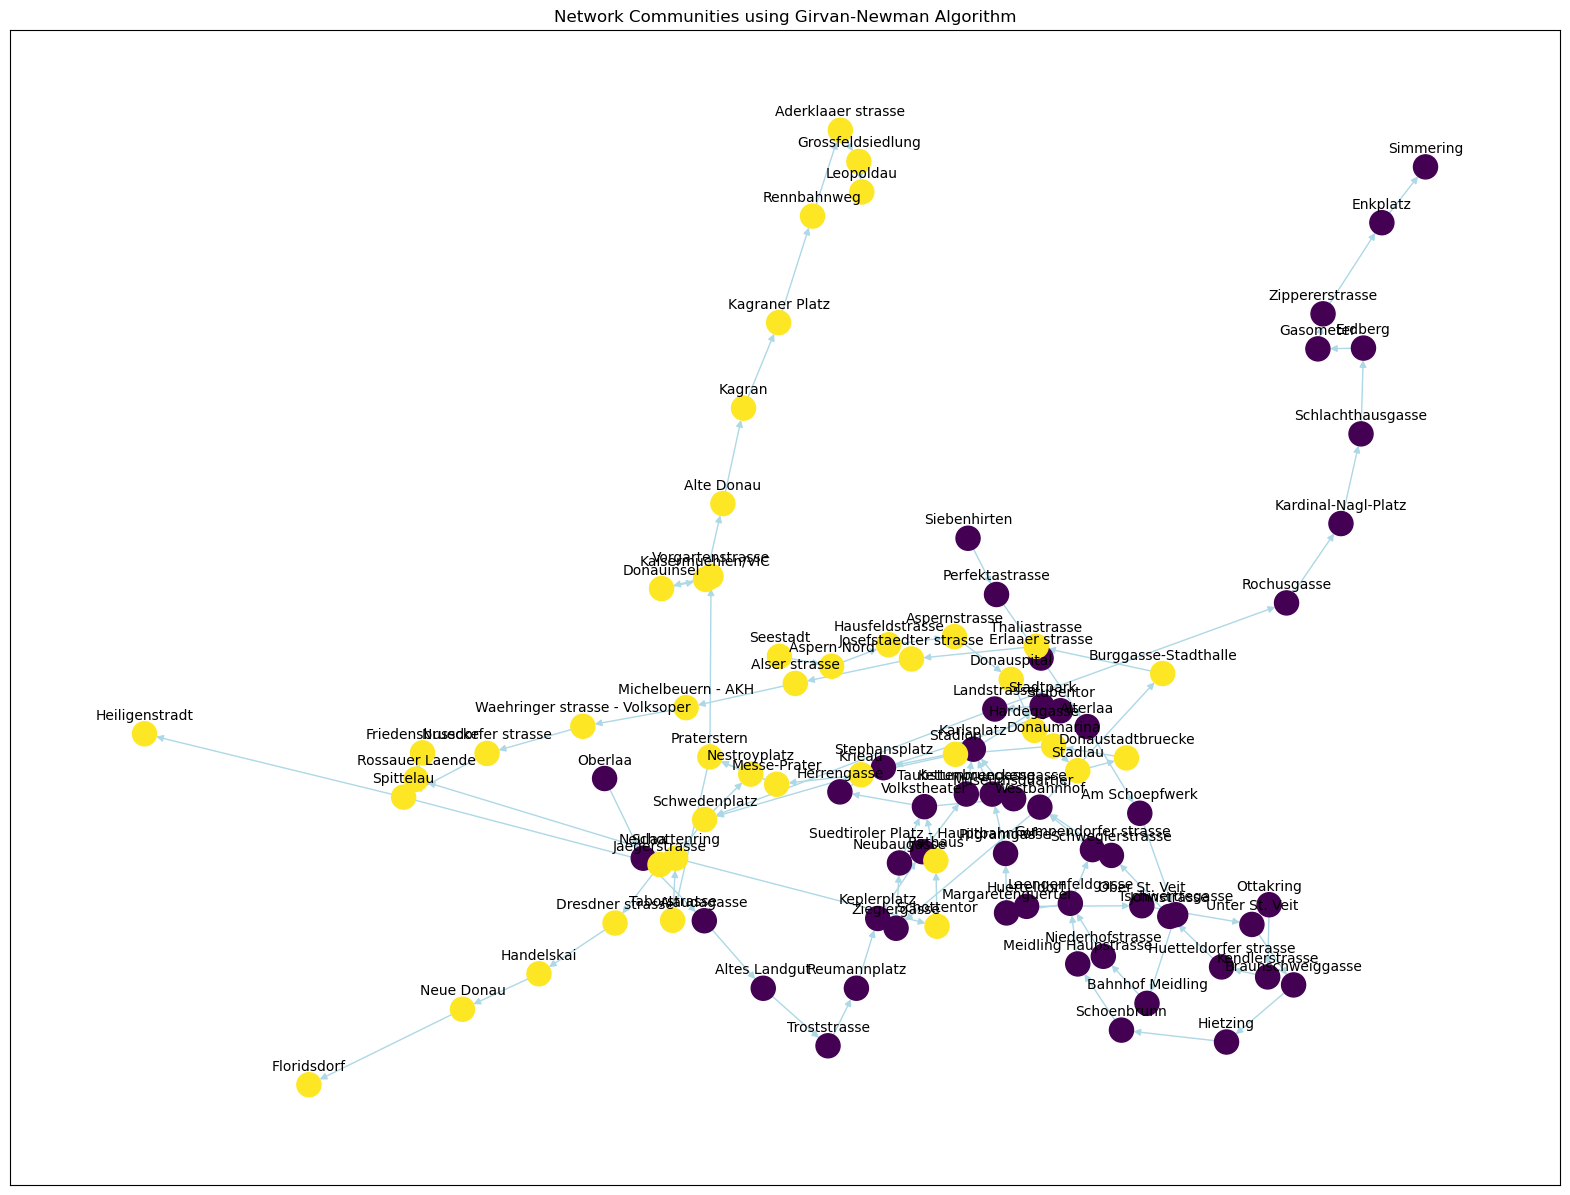

In [32]:
from networkx import edge_betweenness_centrality
from networkx.algorithms.community.centrality import girvan_newman

# Create a directed graph from the DataFrame
G_girvan = nx.from_pandas_edgelist(df_vienna, 'Start', 'Stop', ['Line', 'Color'], create_using=nx.DiGraph())

# Compute the best partition using Girvan-Newman algorithm
communities = girvan_newman(G_girvan)

# Get the first level of communities
first_level_communities = next(communities)

# Define the layout for visualization
pos = nx.spring_layout(G_girvan, seed=42)

# Create a dictionary for labeling nodes
label_pos = {k: [v[0], v[1] + 0.03] for k, v in pos.items()}

# Assign different colors to nodes based on communities
community_map = {node: i for i, community in enumerate(first_level_communities) for node in community}
node_colors = [community_map[node] for node in G_girvan.nodes()]

# Draw the graph with node colors based on communities
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G_girvan, pos, node_color=node_colors)
nx.draw_networkx_edges(G_girvan, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_girvan, label_pos, font_color="black", font_size=10)
plt.title("Network Communities using Girvan-Newman Algorithm")
plt.show()

In [33]:
# Create lists of nodes for each color (purple and yellow)
purple_nodes = [node for node, color in zip(G_girvan.nodes(), node_colors) if color == 0]
yellow_nodes = [node for node, color in zip(G_girvan.nodes(), node_colors) if color == 1]

print("Purple Nodes:", purple_nodes)
print("Yellow Nodes:", yellow_nodes)

Purple Nodes: ['Oberlaa', 'Neulaa', 'Alaudagasse', 'Altes Landgut', 'Troststrasse', 'Reumannplatz', 'Keplerplatz', 'Suedtiroler Platz - Hauptbahnhof', 'Taubstummengasse', 'Karlsplatz', 'Stephansplatz', 'Volkstheater', 'Museumsquartier', 'Ottakring', 'Kendlerstrasse', 'Huetteldorfer strasse', 'Johnstrasse', 'Schweglerstrasse', 'Westbahnhof', 'Zieglergasse', 'Neubaugasse', 'Herrengasse', 'Stubentor', 'Landstrasse', 'Rochusgasse', 'Kardinal-Nagl-Platz', 'Schlachthausgasse', 'Erdberg', 'Gasometer', 'Zippererstrasse', 'Enkplatz', 'Simmering', 'Huetteldorf', 'Ober St. Veit', 'Unter St. Veit', 'Braunschweiggasse', 'Hietzing', 'Schoenbrunn', 'Meidling Haupstrasse', 'Laengenfeldgasse', 'Margaretenguertel', 'Pilgramgasse', 'Kettenbrueckengasse', 'Stadtpark', 'Siebenhirten', 'Perfektastrasse', 'Erlaaer strasse', 'Alterlaa', 'Am Schoepfwerk', 'Tschwerttegasse', 'Bahnhof Meidling', 'Niederhofstrasse', 'Gumpendorfer strasse']
Yellow Nodes: ['Schwedenplatz', 'Nestroyplatz', 'Praterstern', 'Vorgartens

Community 1: {'Stubentor', 'Neubaugasse', 'Simmering', 'Erdberg', 'Gasometer', 'Kardinal-Nagl-Platz', 'Reumannplatz', 'Altes Landgut', 'Stephansplatz', 'Stadtpark', 'Keplerplatz', 'Taubstummengasse', 'Herrengasse', 'Enkplatz', 'Suedtiroler Platz - Hauptbahnhof', 'Alaudagasse', 'Karlsplatz', 'Landstrasse', 'Schlachthausgasse', 'Zippererstrasse', 'Volkstheater', 'Zieglergasse', 'Neulaa', 'Rochusgasse', 'Oberlaa', 'Troststrasse', 'Museumsquartier'}
Community 2: {'Rennbahnweg', 'Nestroyplatz', 'Praterstern', 'Leopoldau', 'Schottentor', 'Alte Donau', 'Grossfeldsiedlung', 'Rathaus', 'Kaisermuehlen/VIC', 'Taborstrasse', 'Donauinsel', 'Kagraner Platz', 'Kagran', 'Aderklaaer strasse', 'Schwedenplatz', 'Schottenring', 'Vorgartenstrasse'}
Community 3: {'Stadion', 'Donaustadtbruecke', 'Stadlau', 'Donaumarina', 'Seestadt', 'Aspern Nord', 'Hardeggasse', 'Krieau', 'Hausfeldstrasse', 'Aspernstrasse', 'Messe-Prater', 'Donauspital'}
Community 4: {'Meidling Haupstrasse', 'Tschwerttegasse', 'Erlaaer stras

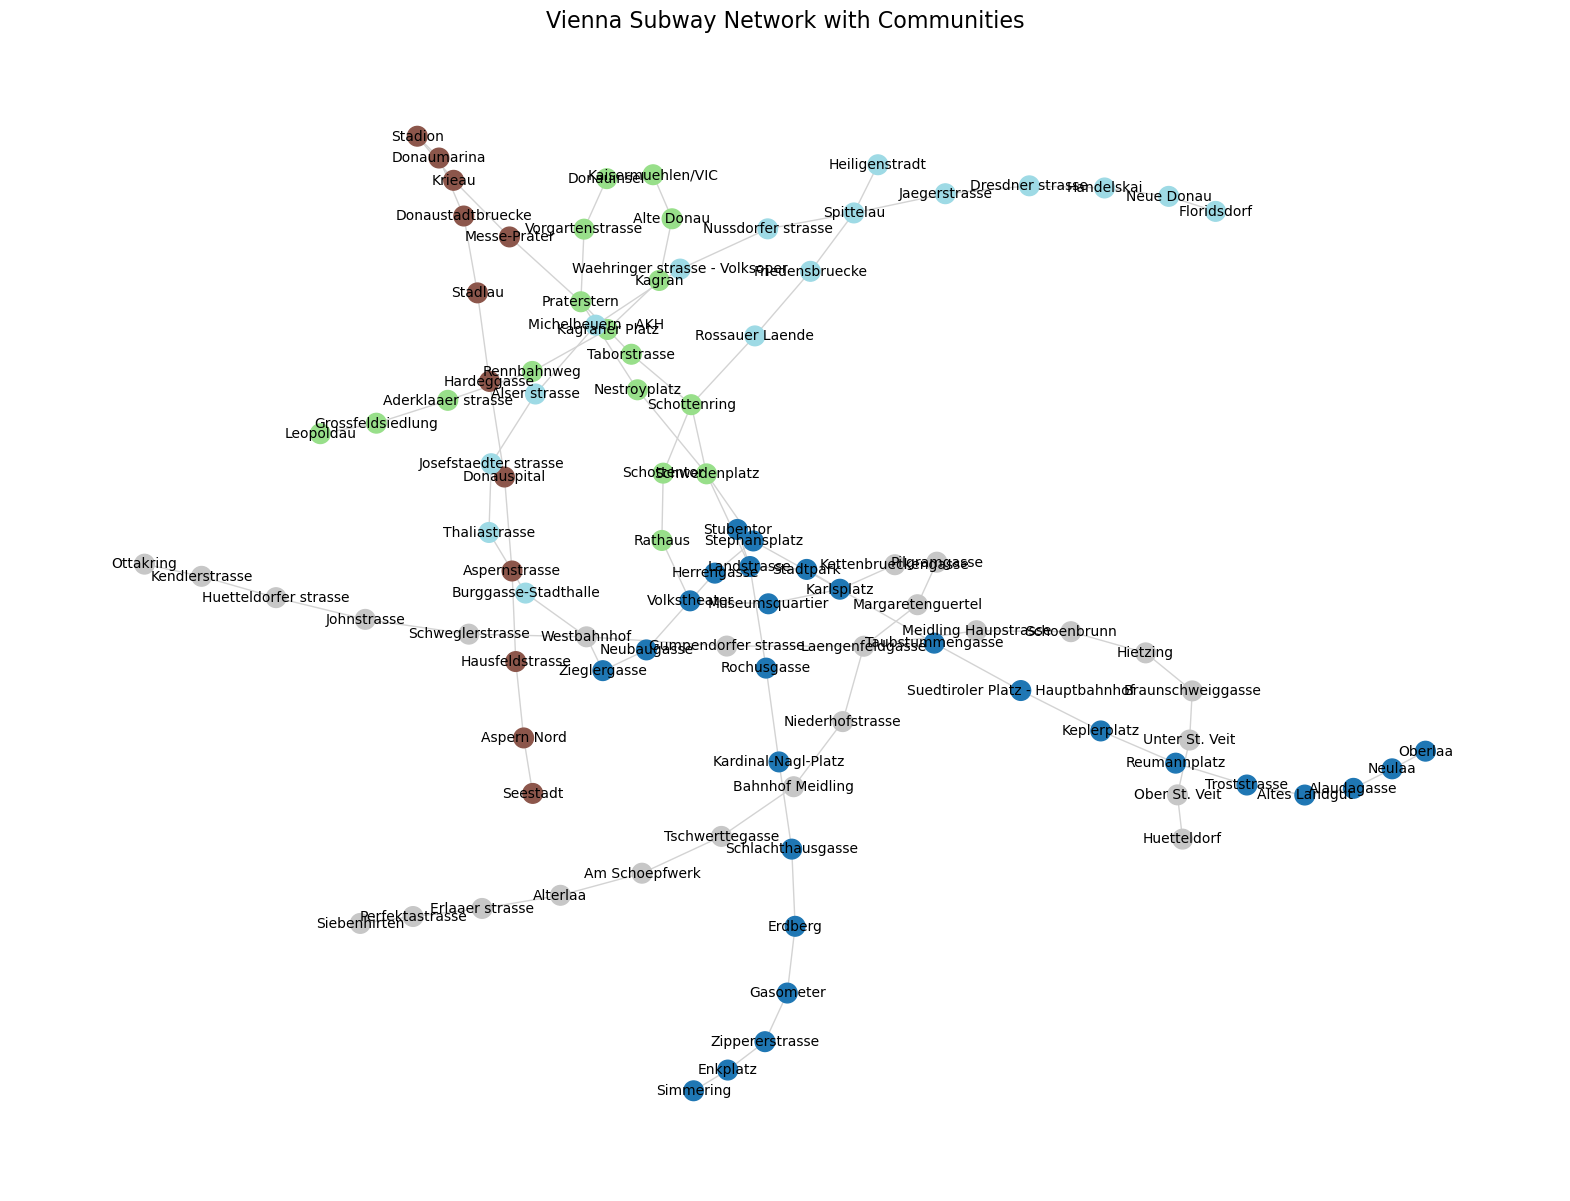

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the graph 'G' and computed the communities using Girvan-Newman algorithm
# ...

# Get the first level of communities (larger values of k result in more and smaller communities)
first_level_communities = next(communities)

# Print out the communities
for i, community in enumerate(first_level_communities):
    print(f"Community {i + 1}: {community}")

# Calculate the spring_layout for node positions
pos = nx.spring_layout(G)

# If 'Oberlaa' node is not in the graph, add it to the node positions
if 'Oberlaa' not in pos:
    # Assuming (x, y) is the desired position for 'Oberlaa'
    pos['Oberlaa'] = (x, y)

# If you want to draw the communities, you can assign different colors to nodes based on their community
community_map = {node: i for i, community in enumerate(first_level_communities) for node in community}
node_colors = [community_map[node] for node in G.nodes()]

# Draw the graph with node colors based on communities
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, edge_color='lightgray')
nx.draw_networkx_labels(G, pos, font_color="black", font_size=10)
plt.title("Vienna Subway Network with Communities", fontsize=16)
plt.axis('off')
plt.show()

In [35]:
import networkx as nx
import pandas as pd

# Assuming you have already loaded the 'Vienna subway.csv' data into a DataFrame called df_vienna

# Step 1: Create a bipartite graph
G_bipartite = nx.Graph()
for _, row in df_vienna.iterrows():
    G_bipartite.add_node(row['Start'], bipartite='Line')
    G_bipartite.add_node(row['Color'], bipartite='Color')
    G_bipartite.add_edge(row['Start'], row['Color'])

# Step 2: Project the bipartite graph onto 'Color' nodes
color_nodes = {node for node, attr in G_bipartite.nodes(data=True) if attr['bipartite'] == 'Color'}
G_vienna = nx.bipartite.projected_graph(G_bipartite, color_nodes)

# Step 3: Extract nodes and edges of the projected graph
nodes = list(G_vienna.nodes())
edges = list(G_vienna.edges())

# Return the nodes and edges
nodes, edges

(['orange', 'purple', 'green', 'brown', 'red'],
 [('orange', 'brown'),
  ('orange', 'red'),
  ('orange', 'purple'),
  ('orange', 'green'),
  ('purple', 'green'),
  ('purple', 'red'),
  ('green', 'brown'),
  ('green', 'red')])